In [1]:
import pandas as pd 
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
cou_df=pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [3]:
cou_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
print(cou_df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
cou_df = cou_df.drop(columns=['car']) #it's removed because it contains lot of missing values

In [6]:
cou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

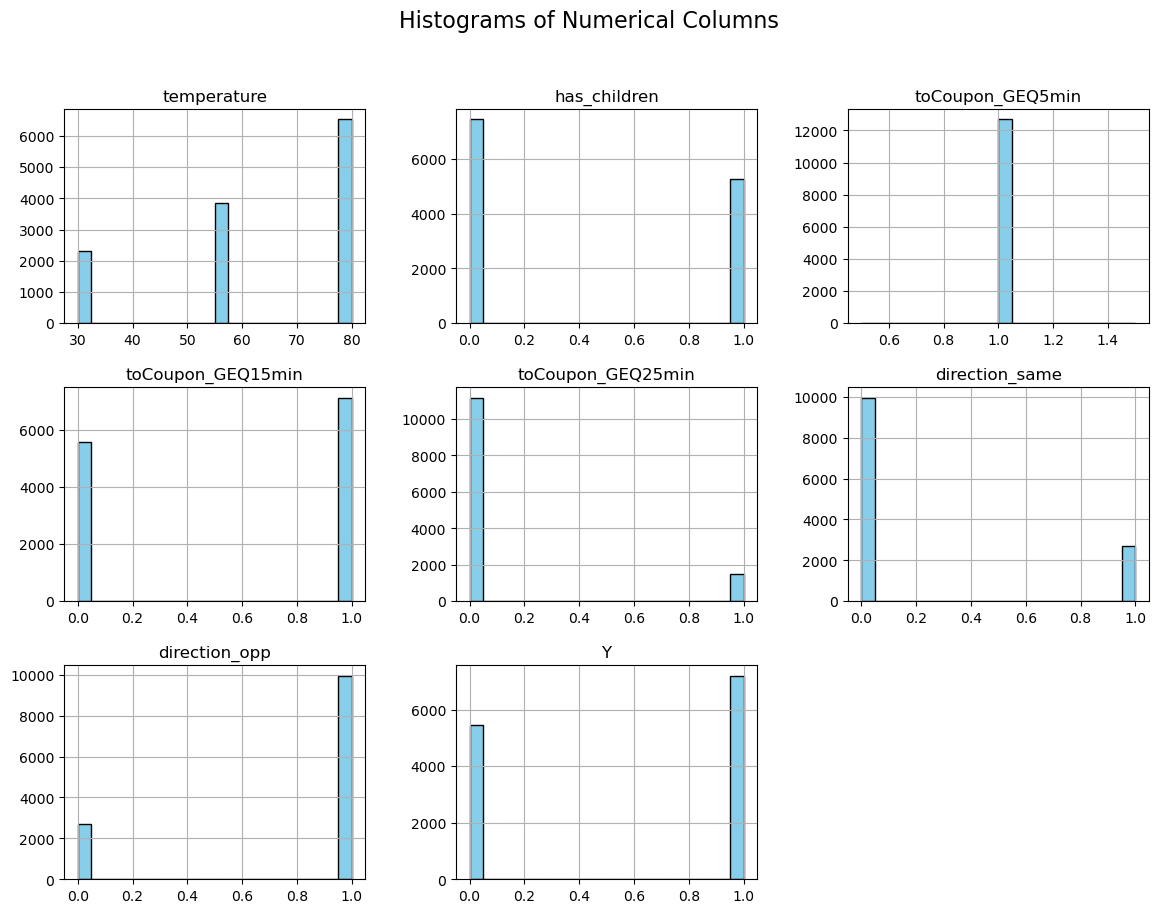

In [7]:
import matplotlib.pyplot as plt

# Histogram for numerical columns
cou_df[['temperature', 'has_children', 'toCoupon_GEQ5min', 
        'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 
        'direction_same', 'direction_opp', 'Y']].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


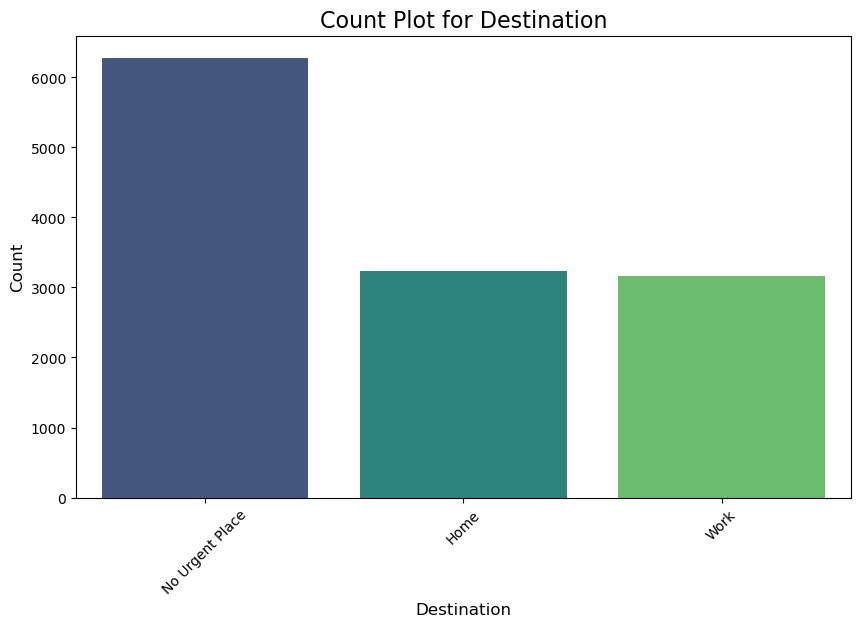

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=cou_df, x='destination', order=cou_df['destination'].value_counts().index, palette='viridis')
plt.title('Count Plot for Destination', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


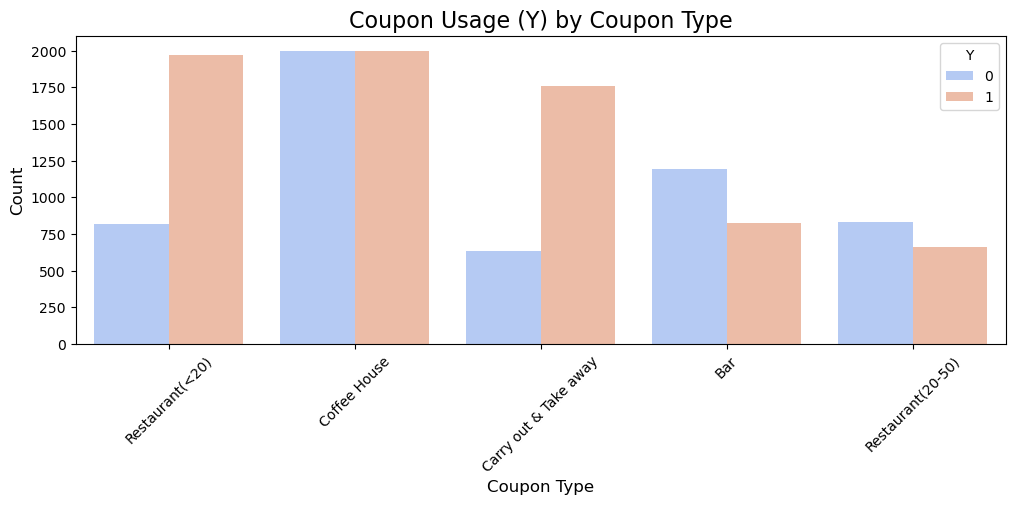

In [86]:
plt.figure(figsize=(12, 4))
sns.countplot(data=cou_df, x='coupon', hue='Y', palette='coolwarm')
plt.title('Coupon Usage (Y) by Coupon Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [13]:
cou_df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Impute missing values with 'never' (or 0, depending on how you map the categories)
frequency_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
#cou_df_encoded[frequency_columns] = cou_df_encoded[frequency_columns].fillna('never')  # Or 0
for column in frequency_columns:
    mode_value = cou_df[column].mode()[0]
    cou_df[column] = cou_df[column].fillna(mode_value)

In [15]:
# Check for any remaining missing values
print(cou_df.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [16]:
# Define a mapping for frequency features
frequency_mapping = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

# Apply the mapping to frequency-based columns
frequency_features = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for feature in frequency_features:
    cou_df[feature] = cou_df[feature].map(frequency_mapping)


columns_to_encode = ['destination', 'passanger', 'weather', 'time', 
                     'coupon', 'expiration', 'gender', 'age', 
                     'maritalStatus', 'education', 'occupation', 'income']

# Perform One-Hot Encoding
cou_df_encoded = pd.get_dummies(cou_df, columns=columns_to_encode, drop_first=True)

# Check if the mapping was applied correctly
cou_df_encoded.head()

,temperature,has_children,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,...,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,55,1,0,0,2,3,2,1,0,0,...,False,True,False,False,True,False,False,False,False,False
1,80,1,0,0,2,3,2,1,0,0,...,False,True,False,False,True,False,False,False,False,False
2,80,1,0,0,2,3,2,1,1,0,...,False,True,False,False,True,False,False,False,False,False
3,80,1,0,0,2,3,2,1,1,0,...,False,True,False,False,True,False,False,False,False,False
4,80,1,0,0,2,3,2,1,1,0,...,False,True,False,False,True,False,False,False,False,False


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
scaler_standard = StandardScaler()   # For continuous features (standardization)
scaler_minmax = MinMaxScaler()       # For frequency features (min-max scaling)

# List of continuous numerical features for Standardization
continuous_features = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 
                       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'has_children']

# Apply Standardization
cou_df_encoded[continuous_features] = scaler_standard.fit_transform(cou_df_encoded[continuous_features])

# Apply Min-Max Scaling to frequency features
frequency_features = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
cou_df_encoded[frequency_features] = scaler_minmax.fit_transform(cou_df_encoded[frequency_features])

# Check the scaled data
cou_df_encoded.head()


,temperature,has_children,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,...,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,-0.433430,1.189378,0.0,0.0,0.5,0.75,0.5,0.0,-1.131581,-0.367745,...,False,True,False,False,True,False,False,False,False,False
1,0.871799,1.189378,0.0,0.0,0.5,0.75,0.5,0.0,-1.131581,-0.367745,...,False,True,False,False,True,False,False,False,False,False
2,0.871799,1.189378,0.0,0.0,0.5,0.75,0.5,0.0,0.883720,-0.367745,...,False,True,False,False,True,False,False,False,False,False
3,0.871799,1.189378,0.0,0.0,0.5,0.75,0.5,0.0,0.883720,-0.367745,...,False,True,False,False,True,False,False,False,False,False
4,0.871799,1.189378,0.0,0.0,0.5,0.75,0.5,0.0,0.883720,-0.367745,...,False,True,False,False,True,False,False,False,False,False


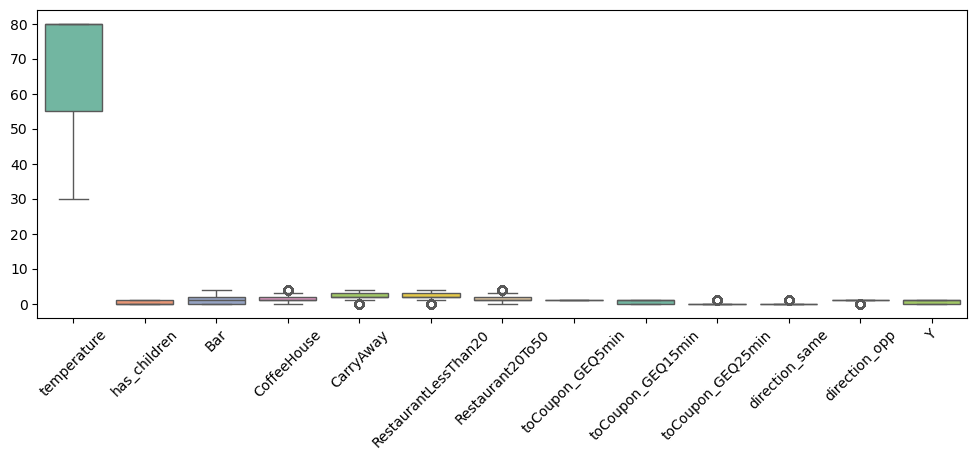

In [88]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=numeric_df, palette='Set2')
plt.xticks(rotation=45)
plt.show()

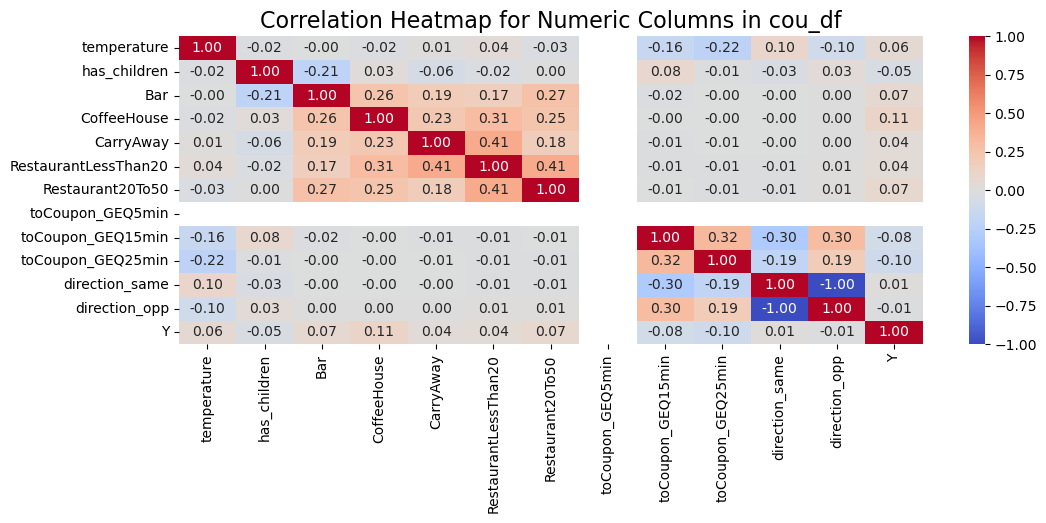

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from cou_df
numeric_df = cou_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the figure and axis for the heatmap
plt.figure(figsize=(12, 4))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title and labels
plt.title('Correlation Heatmap for Numeric Columns in cou_df', fontsize=16)
plt.show()


In [21]:
# Define features (X) and target variable (Y)
X = cou_df_encoded.drop(columns=['Y'])  # Drop the target column
y = cou_df_encoded['Y']  # Target column (coupon acceptance)


In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train/test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(10147, 77) (2537, 77) (10147,) (2537,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Evaluate Random Forest Classifier
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.6830902640914466
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1128
           1       0.69      0.78      0.73      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537

Confusion Matrix for Logistic Regression:
[[ 633  495]
 [ 309 1100]]

Random Forest Accuracy: 0.7481277098935751
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1128
           1       0.75      0.82      0.78      1409

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537

Confusion Matrix for Random Forest Classifier:
[[ 738  390]
 [ 249 1160]]


In [25]:
from sklearn.preprocessing import StandardScaler
# Fit and transform the training data, then transform the test data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.7502714579484179
Tuned Random Forest Accuracy: 0.739850216791486


In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgb)))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7560
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1128
           1       0.76      0.82      0.79      1409

    accuracy                           0.76      2537
   macro avg       0.75      0.75      0.75      2537
weighted avg       0.76      0.76      0.75      2537

Confusion Matrix:
 [[ 769  359]
 [ 260 1149]]


In [28]:
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees (boosting rounds)
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting
    'gamma': [0, 0.1, 0.5],  # Regularization parameter
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                               cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit the grid search
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search_xgb.best_score_))

# Evaluate the best model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)
print("Test Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_best_xgb)))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score: 0.7636
Test Set Accuracy: 0.7651
